In [1]:
!pip install SimpleITK
!pip install pydicom

#Limpia los registros generados
from IPython.display import clear_output

clear_output()

In [2]:
# Librerias 
import SimpleITK as sitk
import matplotlib.pyplot as plt
import pydicom
import matplotlib.pyplot as plt
import os
import pydicom
import numpy as np
import pandas as pd
import os
import glob
import pickle 

from tqdm import tqdm
from sklearn.model_selection import train_test_split

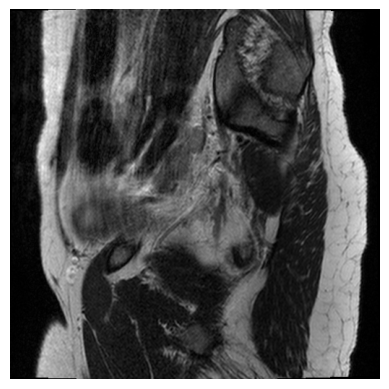

In [4]:
# Leer la carpeta con varios DICOM
image = sitk.ReadImage("/src/Micro-proyecto_Cancer_data/manifest/TCGA-CESC/TCGA-VS-A8EB/05-05-2004-NA-RESSONANCIA MAGNETICA DE ABDOME INFERIOR-20151/401.000000-SAG T2-12004/1-01.dcm")

# Convertir a array
array = sitk.GetArrayFromImage(image)  # [slices, rows, cols]

# Mostrar un corte intermedio
plt.imshow(array[array.shape[0]//2], cmap='gray')
plt.axis('off')
plt.show()


In [7]:
clinical_data= pd.read_csv("../data/cesc_tcga_gdc_clinical_data.tsv", sep="\t")

In [8]:
# Ruta de la carpeta
ruta = "/src/Micro-proyecto_Cancer_data/manifest/TCGA-CESC/"

# Lista de nombres de archivos y carpetas
nombres = [i for i in os.listdir(ruta) if '.' not in i]
print(nombres)


['TCGA-VS-A8Q9', 'TCGA-VS-A8QA', 'TCGA-VS-A8QC', 'TCGA-VS-A8QF', 'TCGA-VS-A8QH', 'TCGA-VS-A8QM', 'TCGA-VS-A94W', 'TCGA-VS-A94X', 'TCGA-VS-A94Y', 'TCGA-VS-A94Z', 'TCGA-VS-A950', 'TCGA-VS-A952', 'TCGA-VS-A953', 'TCGA-VS-A954', 'TCGA-VS-A957', 'TCGA-VS-A958', 'TCGA-VS-A959', 'LICENSE', 'TCGA-VS-A8EB', 'TCGA-VS-A8EC', 'TCGA-VS-A8EG', 'TCGA-VS-A8EH', 'TCGA-VS-A8EI', 'TCGA-VS-A8EJ', 'TCGA-VS-A8EK', 'TCGA-VS-A8EL', 'TCGA-VS-A8Q8', 'TCGA-VS-A9U5', 'TCGA-VS-A9U6', 'TCGA-VS-A9U7', 'TCGA-VS-A9UA', 'TCGA-VS-A9UB', 'TCGA-VS-A9UC', 'TCGA-VS-A9UD', 'TCGA-VS-A9UH', 'TCGA-VS-A9UI', 'TCGA-VS-A9UJ', 'TCGA-VS-A9UL', 'TCGA-VS-A9UM', 'TCGA-VS-A9UO', 'TCGA-VS-A9UP', 'TCGA-VS-A9UQ', 'TCGA-VS-A9UR', 'TCGA-VS-A9UT', 'TCGA-VS-A9UU', 'TCGA-VS-A9UV', 'TCGA-VS-A9UY', 'TCGA-VS-A9UZ', 'TCGA-VS-A9V0', 'TCGA-VS-A9V1', 'TCGA-VS-A9V2', 'TCGA-VS-A9V3', 'TCGA-VS-A9V4', 'TCGA-VS-A9V5', 'TCGA-VS-AA62']


In [9]:
df_filtrado = clinical_data[clinical_data["Patient ID"].isin(nombres)]
df_filtrado.shape


(54, 43)

In [10]:
df_filtrado.value_counts('Disease Type')

Disease Type
Cervical Squamous Cell Carcinoma                42
Mucinous Adenocarcinoma of Endocervical Type    12
Name: count, dtype: int64

In [11]:
images = glob.glob(f'{ruta}/**/*.dcm', recursive=True)
images = pd.DataFrame(images, columns=['path'])
images['Patient ID'] = [i.split('/')[-4] for i in images.path]

In [12]:
images

,path,Patient ID
0,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8Q9
1,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8Q9
2,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8Q9
3,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8Q9
4,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8Q9
...,...,...
19130,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-AA62
19131,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-AA62
19132,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-AA62
19133,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-AA62


In [13]:
#Data Split
X_train, X_test = train_test_split(df_filtrado[['Patient ID', 'Disease Type']], test_size=0.3, random_state=0, stratify=df_filtrado['Disease Type'])
X_val, X_test = train_test_split(X_test, test_size=0.5, random_state=0, stratify=X_test['Disease Type'])

In [14]:
X_train = pd.merge(images, X_train, on='Patient ID')
X_val = pd.merge(images, X_val, on='Patient ID')
X_test = pd.merge(images, X_test, on='Patient ID')

In [15]:
print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (13635, 3)
Validation shape: (3273, 3)
Test shape: (2227, 3)


In [16]:
X_train.value_counts('Disease Type')

Disease Type
Cervical Squamous Cell Carcinoma                8517
Mucinous Adenocarcinoma of Endocervical Type    5118
Name: count, dtype: int64

In [17]:
X_val.value_counts('Disease Type')

Disease Type
Cervical Squamous Cell Carcinoma                2552
Mucinous Adenocarcinoma of Endocervical Type     721
Name: count, dtype: int64

In [18]:
X_test.value_counts('Disease Type')

Disease Type
Cervical Squamous Cell Carcinoma                1824
Mucinous Adenocarcinoma of Endocervical Type     403
Name: count, dtype: int64

In [19]:
# Training data 

X_train = X_train.reset_index(drop=True)
X_train['image'] = None
for ix,i in tqdm(enumerate(X_train.path)):
    image = sitk.ReadImage(i)
    image = sitk.GetArrayFromImage(image)
    
    X_train.loc[ix, 'image'] = image

13635it [07:24, 30.67it/s]


In [20]:
X_val = X_val.reset_index(drop=True)
X_val['image'] = None
for ix,i in tqdm(enumerate(X_val.path)):
    image = sitk.ReadImage(i)
    image = sitk.GetArrayFromImage(image)
    X_val.loc[ix, 'image'] = image

3273it [01:36, 33.99it/s]


In [21]:
X_test = X_test.reset_index(drop=True)
X_test['image'] = None
for ix,i in tqdm(enumerate(X_test.path)):
    image = sitk.ReadImage(i)
    image = sitk.GetArrayFromImage(image)
    
    X_test.loc[ix, 'image'] = image

2227it [01:11, 30.94it/s]


### One-hot-encoding for target variable

In [5]:
#One-hot-encoding target variable
mapping = {'Cervical Squamous Cell Carcinoma':0, 'Mucinous Adenocarcinoma of Endocervical Type':1}
X_train['Target'] = X_train['Disease Type'].map(mapping)
X_val['Target'] = X_val['Disease Type'].map(mapping)
X_test['Target'] = X_test['Disease Type'].map(mapping)

NameError: name 'X_train' is not defined

In [25]:
print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (13635, 5)
Validation shape: (3273, 5)
Test shape: (2227, 5)


In [30]:
X_train.head(15)

,path,Patient ID,Disease Type,image,Target
0,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8QA,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
1,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8QA,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
2,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8QA,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
3,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8QA,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
4,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8QA,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
5,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8QA,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
6,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8QA,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
7,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8QA,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
8,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8QA,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
9,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8QA,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0


### Shuffle dataframe with fixed seed

In [4]:
X_train = X_train.sample(frac=1, random_state=42).reset_index(drop=True)
X_val = X_val.sample(frac=1, random_state=42).reset_index(drop=True)
X_test = X_test.sample(frac=1, random_state=42).reset_index(drop=True)

NameError: name 'X_train' is not defined

In [33]:
X_train.head(15)

,path,Patient ID,Disease Type,image,Target
0,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9UT,Mucinous Adenocarcinoma of Endocervical Type,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1
1,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9UP,Mucinous Adenocarcinoma of Endocervical Type,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1
2,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8EJ,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
3,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9V2,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
4,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9UR,Mucinous Adenocarcinoma of Endocervical Type,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1
5,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-AA62,Cervical Squamous Cell Carcinoma,"[[[0, 3, 3, 4, 3, 3, 4, 3, 4, 3, 4, 3, 2, 3, 5...",0
6,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8EI,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...",0
7,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9UO,Mucinous Adenocarcinoma of Endocervical Type,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1
8,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A954,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 96, 94, 94, 93, 86, 73...",0
9,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9UM,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0


In [3]:
pickle.dump(X_train, open('../data/X_train_raw.pk', 'wb'))
pickle.dump(X_val, open('../data/X_val_raw.pk', 'wb'))
pickle.dump(X_test, open('../data/X_test_raw.pk', 'wb'))

NameError: name 'X_train' is not defined

In [35]:
!ls ./data/*.pk -lstgha

ls: cannot access './data/*.pk': No such file or directory


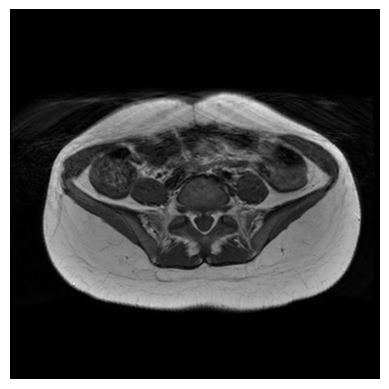

In [38]:
plt.imshow(X_train.loc[50].image[0], cmap='gray')
plt.axis('off')
plt.show()

In [16]:
path_train = '../data/X_train_raw.pk'
path_val = '../data/X_val_raw.pk'
path_test = '../data/X_test_raw.pk'
with open(path_train, "rb") as f:
    data_train = pickle.load(f)
data_train

,path,Patient ID,Disease Type,image,Target
0,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9UT,Mucinous Adenocarcinoma of Endocervical Type,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1
1,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9UP,Mucinous Adenocarcinoma of Endocervical Type,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1
2,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8EJ,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
3,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9V2,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
4,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9UR,Mucinous Adenocarcinoma of Endocervical Type,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1
...,...,...,...,...,...
13630,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9UC,Cervical Squamous Cell Carcinoma,"[[[168, 169, 170, 172, 174, 174, 172, 171, 170...",0
13631,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9V5,Mucinous Adenocarcinoma of Endocervical Type,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1
13632,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9UD,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
13633,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A94W,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0


In [17]:
df_split = data_train['path'].str.split('/', expand=True)

# Opcional: poner nombres a las nuevas columnas
df_split.columns = [f'level_{i}' for i in range(df_split.shape[1])]

# Unir con el df original si quieres mantenerlo
data_train = pd.concat([data_train, df_split], axis=1)
data_train['level_6'] = data_train['level_6'].astype(str)
data_train = data_train[data_train['level_6'].str.contains('ABDOME', na=False)]
data_train['level_7'] = data_train['level_7'].astype(str)
data_train = data_train[data_train['level_7'].str.contains('T2', na=False)]
data_train = data_train[data_train['level_7'].str.contains('-A', na=False)]
data_train

,path,Patient ID,Disease Type,image,Target,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8
3,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9V2,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0,,src,Micro-proyecto_Cancer_data,manifest,TCGA-CESC,TCGA-VS-A9V2,05-17-2007-NA-RESSONANCIA MAGNETICA DE ABDOME ...,6.000000-AX T2 FRFSE-40588,1-19.dcm
28,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9UY,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0,,src,Micro-proyecto_Cancer_data,manifest,TCGA-CESC,TCGA-VS-A9UY,05-31-2006-NA-RESSONANCIA MAGNETICA DE ABDOME ...,601.000000-AXI T2 3mm HR-16666,1-20.dcm
44,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A94W,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0,,src,Micro-proyecto_Cancer_data,manifest,TCGA-CESC,TCGA-VS-A94W,05-02-2005-NA-RESSONANCIA MAGNETICA DE ABDOME ...,7.000000-AX T2 FRFSE-42572,1-16.dcm
46,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9UP,Mucinous Adenocarcinoma of Endocervical Type,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1,,src,Micro-proyecto_Cancer_data,manifest,TCGA-CESC,TCGA-VS-A9UP,12-19-2004-NA-RESSONANCIA MAGNETICA DE ABDOME ...,4.000000-AX T2 FRFSE-14557,1-44.dcm
57,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9V2,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0,,src,Micro-proyecto_Cancer_data,manifest,TCGA-CESC,TCGA-VS-A9V2,05-17-2007-NA-RESSONANCIA MAGNETICA DE ABDOME ...,6.000000-AX T2 FRFSE-40588,1-50.dcm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13615,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9UT,Mucinous Adenocarcinoma of Endocervical Type,"[[[121, 118, 115, 115, 119, 126, 137, 148, 154...",1,,src,Micro-proyecto_Cancer_data,manifest,TCGA-CESC,TCGA-VS-A9UT,02-18-2007-NA-RESSONANCIA MAGNETICA DE ABDOME ...,801.000000-AXI T2 3mm HR-27863,1-11.dcm
13617,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A950,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0,,src,Micro-proyecto_Cancer_data,manifest,TCGA-CESC,TCGA-VS-A950,04-18-2005-NA-RESSONANCIA MAGNETICA DE ABDOME ...,1301.000000-AXI T2 ssSH 5MM-25910,1-08.dcm
13621,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9UV,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0,,src,Micro-proyecto_Cancer_data,manifest,TCGA-CESC,TCGA-VS-A9UV,06-06-2007-NA-RESSONANCIA MAGNETICA DE ABDOME ...,401.000000-AXI T2 ssSH 5MM-01881,1-11.dcm
13630,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9UC,Cervical Squamous Cell Carcinoma,"[[[168, 169, 170, 172, 174, 174, 172, 171, 170...",0,,src,Micro-proyecto_Cancer_data,manifest,TCGA-CESC,TCGA-VS-A9UC,10-02-2006-NA-RESSONANCIA MAGNETICA DE ABDOME ...,801.000000-AXI T2 3mm HR-60794,1-21.dcm


In [18]:
num_unicos = data_train['level_7'].nunique()
print(num_unicos)

56


In [3]:
with open(path_test, "rb") as f:
    data_test = pickle.load(f)
data_test

,path,Patient ID,Disease Type,image,Target
0,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8QF,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
1,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8QH,Mucinous Adenocarcinoma of Endocervical Type,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1
2,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9U5,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
3,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8QF,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
4,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A959,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
...,...,...,...,...,...
2222,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9U5,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
2223,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8EB,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 181,...",0
2224,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8EB,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
2225,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8EH,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0


In [19]:
df_split = data_test['path'].str.split('/', expand=True)

# Opcional: poner nombres a las nuevas columnas
df_split.columns = [f'level_{i}' for i in range(df_split.shape[1])]

# Unir con el df original si quieres mantenerlo
data_test = pd.concat([data_test, df_split], axis=1)
data_test['level_6'] = data_test['level_6'].astype(str)
data_test = data_test[data_test['level_6'].str.contains('ABDOME', na=False)]
data_test['level_7'] = data_test['level_7'].astype(str)
data_test = data_test[data_test['level_7'].str.contains('T2', na=False)]
data_test = data_test[data_test['level_7'].str.contains('-A', na=False)]
data_test

,path,Patient ID,Disease Type,image,Target,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8
4,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A959,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0,,src,Micro-proyecto_Cancer_data,manifest,TCGA-CESC,TCGA-VS-A959,07-07-2004-NA-RESSONANCIA MAGNETICA DE ABDOME ...,301.000000-AXI T2 ssSH 5MM-12549,1-16.dcm
5,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A959,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0,,src,Micro-proyecto_Cancer_data,manifest,TCGA-CESC,TCGA-VS-A959,07-07-2004-NA-RESSONANCIA MAGNETICA DE ABDOME ...,601.000000-AXI T2 3mm HR-38832,1-11.dcm
17,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9UQ,Mucinous Adenocarcinoma of Endocervical Type,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1,,src,Micro-proyecto_Cancer_data,manifest,TCGA-CESC,TCGA-VS-A9UQ,08-15-2005-NA-RESSONANCIA MAGNETICA DE ABDOME ...,3.000000-AX T2 FRFSE-75134,1-26.dcm
24,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A957,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0,,src,Micro-proyecto_Cancer_data,manifest,TCGA-CESC,TCGA-VS-A957,05-26-2004-NA-RESSONANCIA MAGNETICA DE ABDOME ...,4.000000-AX T2 FRFSE-99316,1-20.dcm
25,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8EH,Cervical Squamous Cell Carcinoma,"[[[1106, 1053, 1010, 1001, 1024, 1046, 1039, 1...",0,,src,Micro-proyecto_Cancer_data,manifest,TCGA-CESC,TCGA-VS-A8EH,04-10-2006-NA-RESSONANCIA MAGNETICA DE ABDOME ...,7.000000-AX T2 FRFSE-85347,1-01.dcm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8EH,Cervical Squamous Cell Carcinoma,"[[[8, 5, 8, 10, 10, 10, 7, 9, 14, 10, 13, 15, ...",0,,src,Micro-proyecto_Cancer_data,manifest,TCGA-CESC,TCGA-VS-A8EH,04-10-2006-NA-RESSONANCIA MAGNETICA DE ABDOME ...,3.000000-AX T2 FRFSE-62668,1-01.dcm
2213,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A959,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0,,src,Micro-proyecto_Cancer_data,manifest,TCGA-CESC,TCGA-VS-A959,07-07-2004-NA-RESSONANCIA MAGNETICA DE ABDOME ...,301.000000-AXI T2 ssSH 5MM-12549,1-39.dcm
2222,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9U5,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0,,src,Micro-proyecto_Cancer_data,manifest,TCGA-CESC,TCGA-VS-A9U5,08-29-2004-NA-RESSONANCIA MAGNETICA DE ABDOME ...,4.000000-AX T2 FRFSE-87969,1-41.dcm
2224,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8EB,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0,,src,Micro-proyecto_Cancer_data,manifest,TCGA-CESC,TCGA-VS-A8EB,05-05-2004-NA-RESSONANCIA MAGNETICA DE ABDOME ...,701.000000-AXI T2 3mm HR-28517,1-16.dcm


In [20]:
with open(path_val, "rb") as f:
    data_val = pickle.load(f)
data_val

,path,Patient ID,Disease Type,image,Target
0,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8EC,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
1,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9V4,Mucinous Adenocarcinoma of Endocervical Type,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1
2,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9V3,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
3,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A953,Cervical Squamous Cell Carcinoma,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0
4,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9V4,Mucinous Adenocarcinoma of Endocervical Type,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1
...,...,...,...,...,...
3268,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9UJ,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
3269,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9UJ,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
3270,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9UZ,Mucinous Adenocarcinoma of Endocervical Type,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1
3271,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9UJ,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0


In [21]:
df_split = data_val['path'].str.split('/', expand=True)

# Opcional: poner nombres a las nuevas columnas
df_split.columns = [f'level_{i}' for i in range(df_split.shape[1])]

# Unir con el df original si quieres mantenerlo
data_val = pd.concat([data_val, df_split], axis=1)
data_val['level_6'] = data_val['level_6'].astype(str)
data_val = data_val[data_val['level_6'].str.contains('ABDOME', na=False)]
data_val['level_7'] = data_val['level_7'].astype(str)
data_val = data_val[data_val['level_7'].str.contains('T2', na=False)]
data_val = data_val[data_val['level_7'].str.contains('-A', na=False)]
data_val

,path,Patient ID,Disease Type,image,Target,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8
0,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8EC,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0,,src,Micro-proyecto_Cancer_data,manifest,TCGA-CESC,TCGA-VS-A8EC,10-04-2004-NA-RESSONANCIA MAGNETICA DE ABDOME ...,3.000000-Ax T2 TRIG.-49398,1-33.dcm
2,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9V3,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0,,src,Micro-proyecto_Cancer_data,manifest,TCGA-CESC,TCGA-VS-A9V3,05-13-2007-NA-RESSONANCIA MAGNETICA ABDOME INF...,701.000000-AXI T2 3mm HR-76342,1-19.dcm
8,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9V4,Mucinous Adenocarcinoma of Endocervical Type,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1,,src,Micro-proyecto_Cancer_data,manifest,TCGA-CESC,TCGA-VS-A9V4,02-18-2007-NA-RESSONANCIA MAGNETICA DE ABDOME ...,301.000000-AXI T2 ssSH 5MM-28231,1-29.dcm
9,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9UJ,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0,,src,Micro-proyecto_Cancer_data,manifest,TCGA-CESC,TCGA-VS-A9UJ,04-18-2006-NA-RESSONANCIA MAGNETICA DE ABDOME ...,4.000000-AX T2 FRFSE-95200,1-18.dcm
16,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9UJ,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0,,src,Micro-proyecto_Cancer_data,manifest,TCGA-CESC,TCGA-VS-A9UJ,04-18-2006-NA-RESSONANCIA MAGNETICA DE ABDOME ...,4.000000-AX T2 FRFSE-95200,1-51.dcm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9V4,Mucinous Adenocarcinoma of Endocervical Type,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1,,src,Micro-proyecto_Cancer_data,manifest,TCGA-CESC,TCGA-VS-A9V4,02-18-2007-NA-RESSONANCIA MAGNETICA DE ABDOME ...,301.000000-AXI T2 ssSH 5MM-28231,1-42.dcm
3264,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8EC,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0,,src,Micro-proyecto_Cancer_data,manifest,TCGA-CESC,TCGA-VS-A8EC,10-04-2004-NA-RESSONANCIA MAGNETICA DE ABDOME ...,3.000000-Ax T2 TRIG.-49398,1-13.dcm
3266,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9V3,Cervical Squamous Cell Carcinoma,"[[[101, 104, 109, 117, 121, 117, 108, 103, 107...",0,,src,Micro-proyecto_Cancer_data,manifest,TCGA-CESC,TCGA-VS-A9V3,05-13-2007-NA-RESSONANCIA MAGNETICA ABDOME INF...,1201.000000-AXI T2 3mm HR-40254,1-05.dcm
3267,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9V4,Mucinous Adenocarcinoma of Endocervical Type,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1,,src,Micro-proyecto_Cancer_data,manifest,TCGA-CESC,TCGA-VS-A9V4,02-18-2007-NA-RESSONANCIA MAGNETICA DE ABDOME ...,801.000000-AXI T2 3mm HR-54355,1-21.dcm


In [ ]:
df_total = pd.concat([data_train, data_test, data_val], ignore_index=True)
print(df_total.shape)

(3583, 14)


In [24]:
num_unicos = df_total['Patient ID'].nunique()
print(num_unicos)

36


In [25]:
# del archivo cargado en data_test guarda en formato png las imagenes RGB de la columna image de acuerdo a su clasificacion en la columna Target, en carpetas llamadas clase_0 y clase_1 dento de un path designado
import os
from PIL import Image
path_save = r'C:\Users\david\OneDrive\Documentos\Maestria en IA\Proyecto de grado 1\Microproyecto\Programa_microproyecto\Microproyecto_Cervical_Cancer_Classifier\data\dataset2'

try:
    for idx, row in df_total.iterrows():
        folder = "clase_0" if row.Target == 0 else "clase_1"
        path_folder = os.path.join(path_save, folder)
        os.makedirs(path_folder, exist_ok=True)
        
        img_array = row.image
        if isinstance(img_array, list):
            img_array = img_array[0]

        # Si la imagen es (1, H, W), quitamos el canal
        if img_array.ndim == 3 and img_array.shape[0] == 1:
            img_array = img_array[0]

        # Asegurar tipo uint8
        img_array = np.uint8(img_array)

        # Convertir a imagen PIL en escala de grises
        img = Image.fromarray(img_array, mode="L")

        # Redimensionar a 224x224
        img_resized = img.resize((224, 224), Image.Resampling.LANCZOS)

        # Nombre del archivo con Patient ID
        patient_id = str(row["Patient ID"])
        level_7 = str(row["level_7"])
        level_8 = str(row["level_8"])
        filename = f"{patient_id}_{level_7}_{level_8}_img_{idx}.png"
        path_folder_files = os.path.join(path_folder, filename)
        # Guardar
        img_resized.save(path_folder_files)
        print(f"✅ {idx}: {patient_id} guardada en {path_folder_files}, shape final: {np.array(img_resized).shape}")
except Exception as e:
    print(f"❌ Error en el índice {idx}, Patient ID {patient_id}: {e}")

C:\Users\david\AppData\Local\Temp\ipykernel_15036\3293501289.py:24: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(img_array, mode="L")


✅ 0: TCGA-VS-A9V2 guardada en C:\Users\david\OneDrive\Documentos\Maestria en IA\Proyecto de grado 1\Microproyecto\Programa_microproyecto\Microproyecto_Cervical_Cancer_Classifier\data\dataset2\clase_0\TCGA-VS-A9V2_6.000000-AX T2 FRFSE-40588_1-19.dcm_img_0.png, shape final: (224, 224)
✅ 1: TCGA-VS-A9UY guardada en C:\Users\david\OneDrive\Documentos\Maestria en IA\Proyecto de grado 1\Microproyecto\Programa_microproyecto\Microproyecto_Cervical_Cancer_Classifier\data\dataset2\clase_0\TCGA-VS-A9UY_601.000000-AXI T2 3mm HR-16666_1-20.dcm_img_1.png, shape final: (224, 224)
✅ 2: TCGA-VS-A94W guardada en C:\Users\david\OneDrive\Documentos\Maestria en IA\Proyecto de grado 1\Microproyecto\Programa_microproyecto\Microproyecto_Cervical_Cancer_Classifier\data\dataset2\clase_0\TCGA-VS-A94W_7.000000-AX T2 FRFSE-42572_1-16.dcm_img_2.png, shape final: (224, 224)
✅ 3: TCGA-VS-A9UP guardada en C:\Users\david\OneDrive\Documentos\Maestria en IA\Proyecto de grado 1\Microproyecto\Programa_microproyecto\Micropr